In [205]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 



import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


import warnings
warnings.filterwarnings("ignore")

In [158]:
import csv
import pandas as pd
rd=open(r'C:\\Users\\ALVIN\\Downloads\\healthcare-dataset-stroke-data.csv')
rd=pd.read_csv(rd)

In [159]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [160]:
rd.shape

(5110, 12)

In [161]:
rd.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [162]:
rd.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [163]:
newrd=rd.dropna(axis=0)

In [164]:
df=newrd
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [165]:
df.drop('id',axis=1,inplace=True)

In [166]:
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


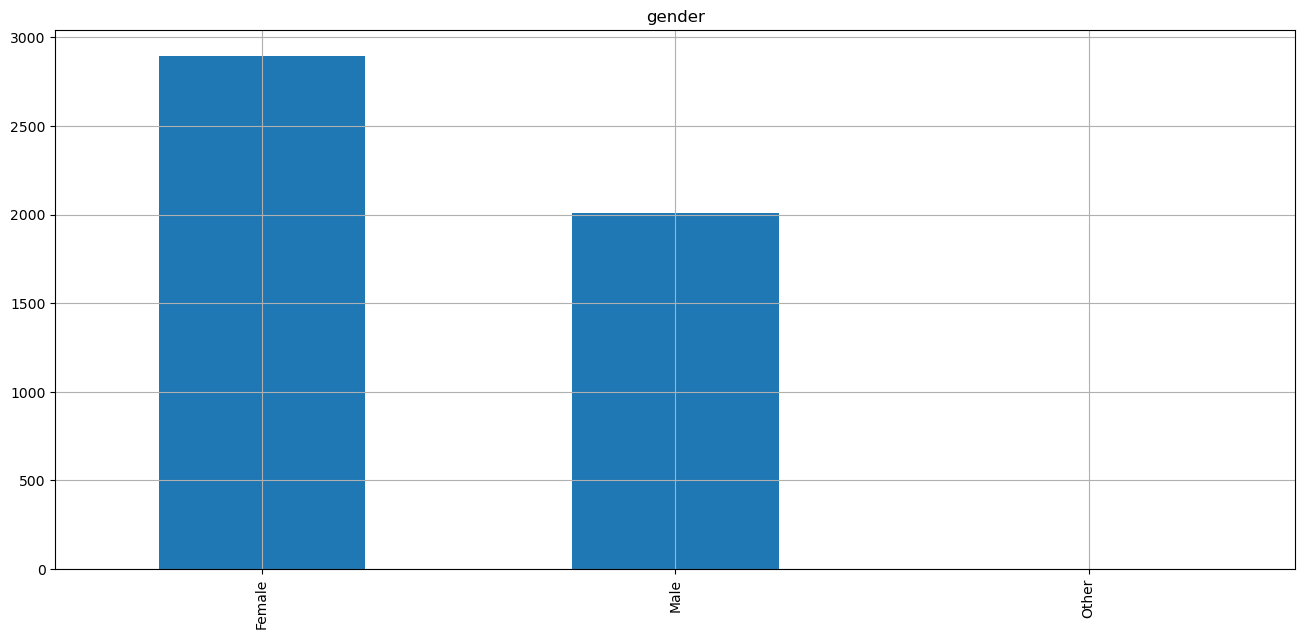

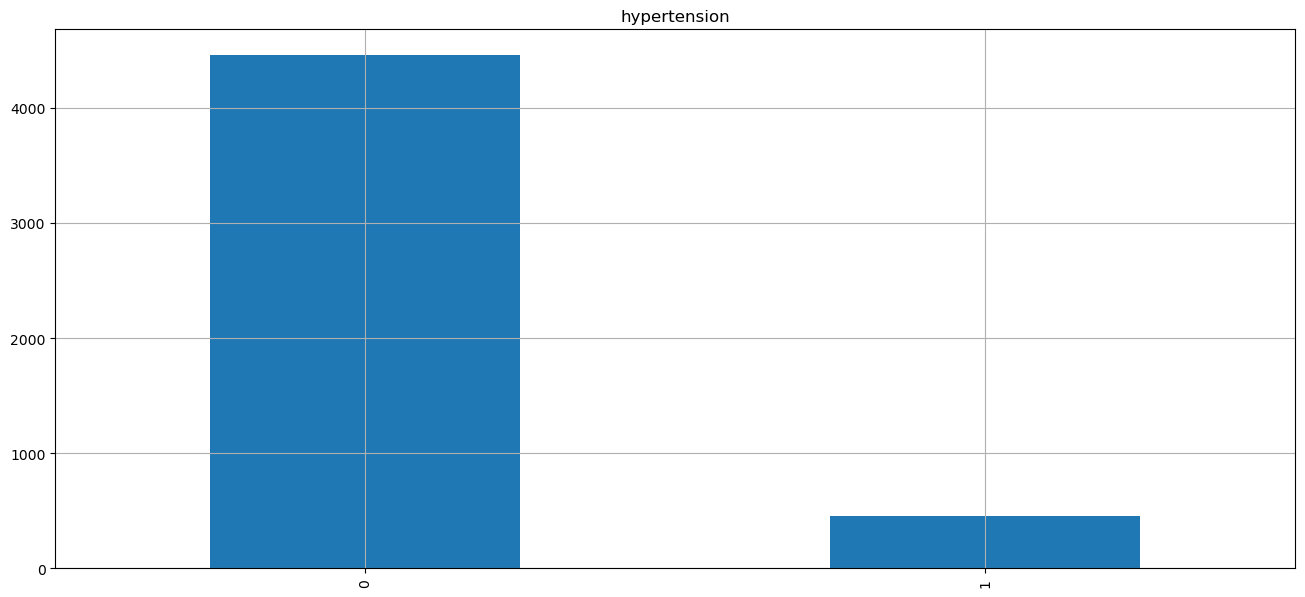

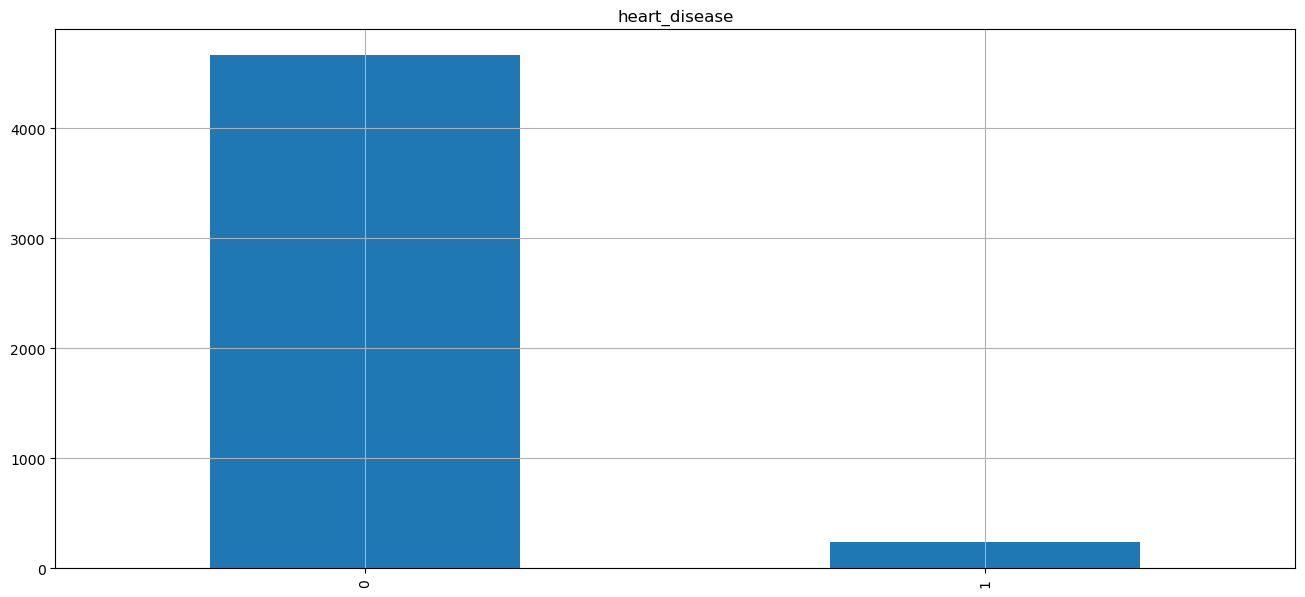

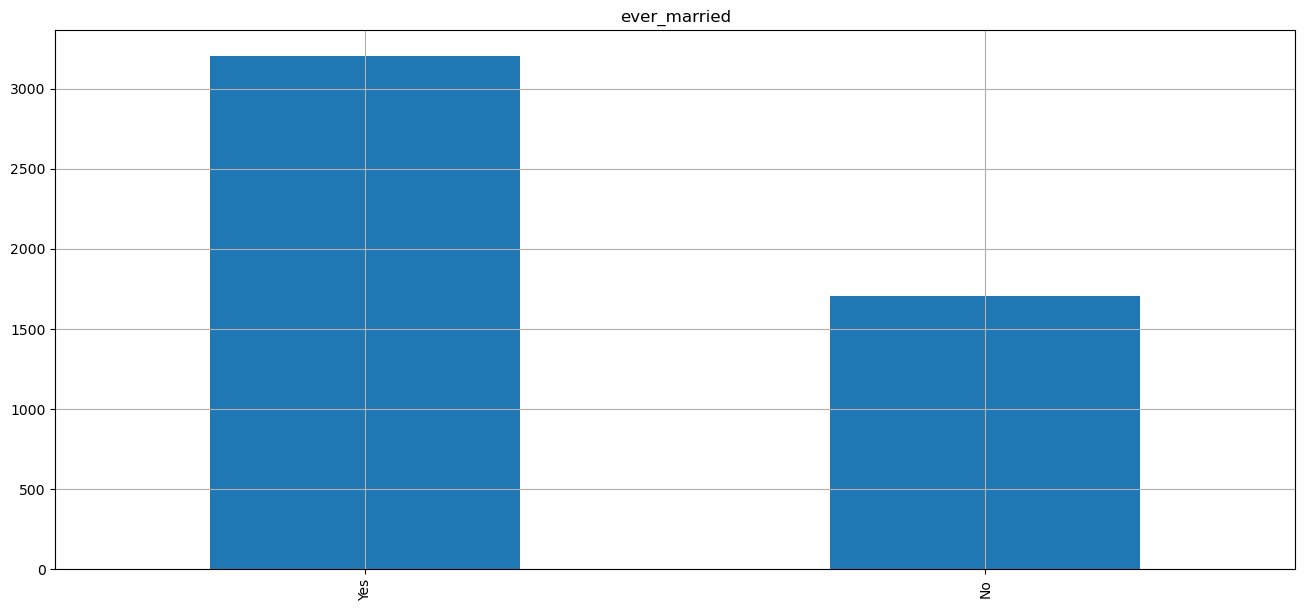

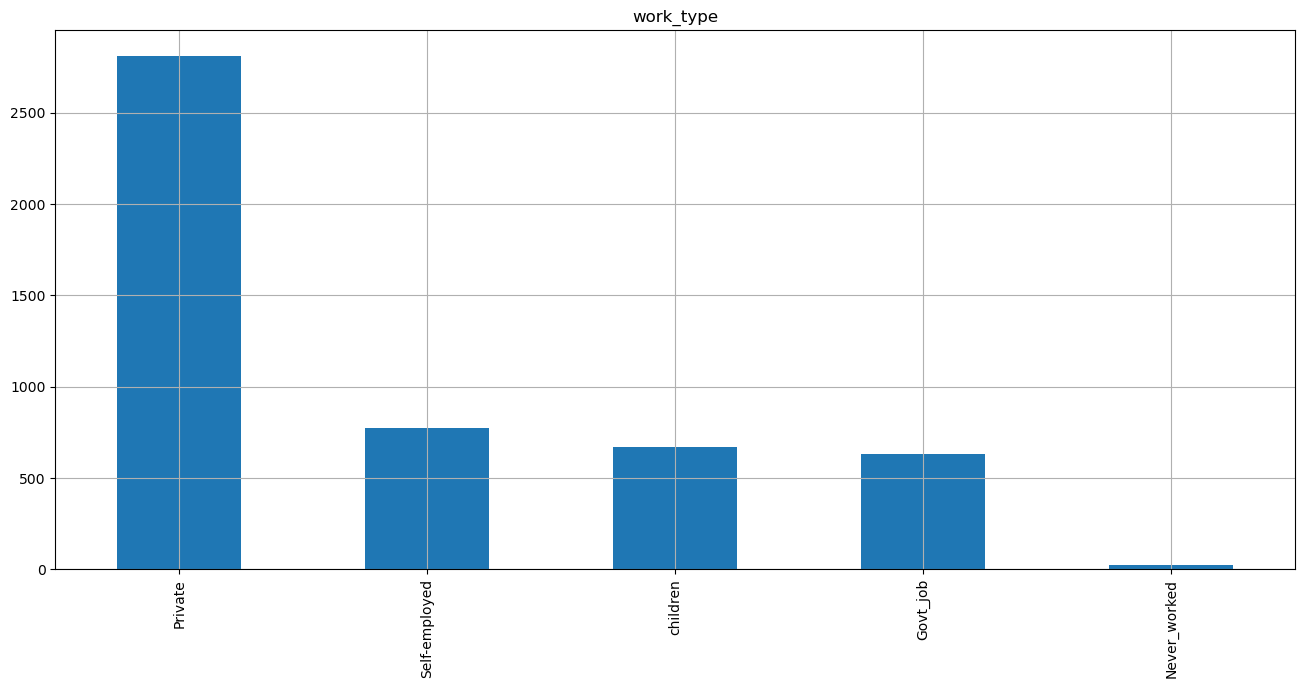

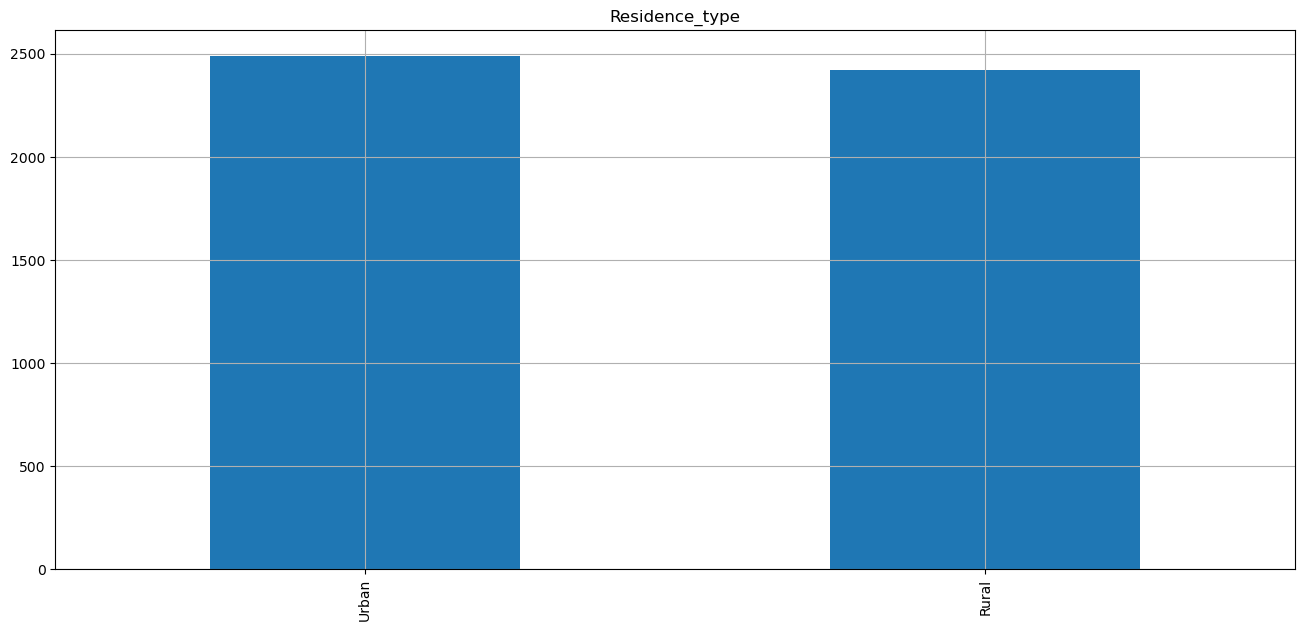

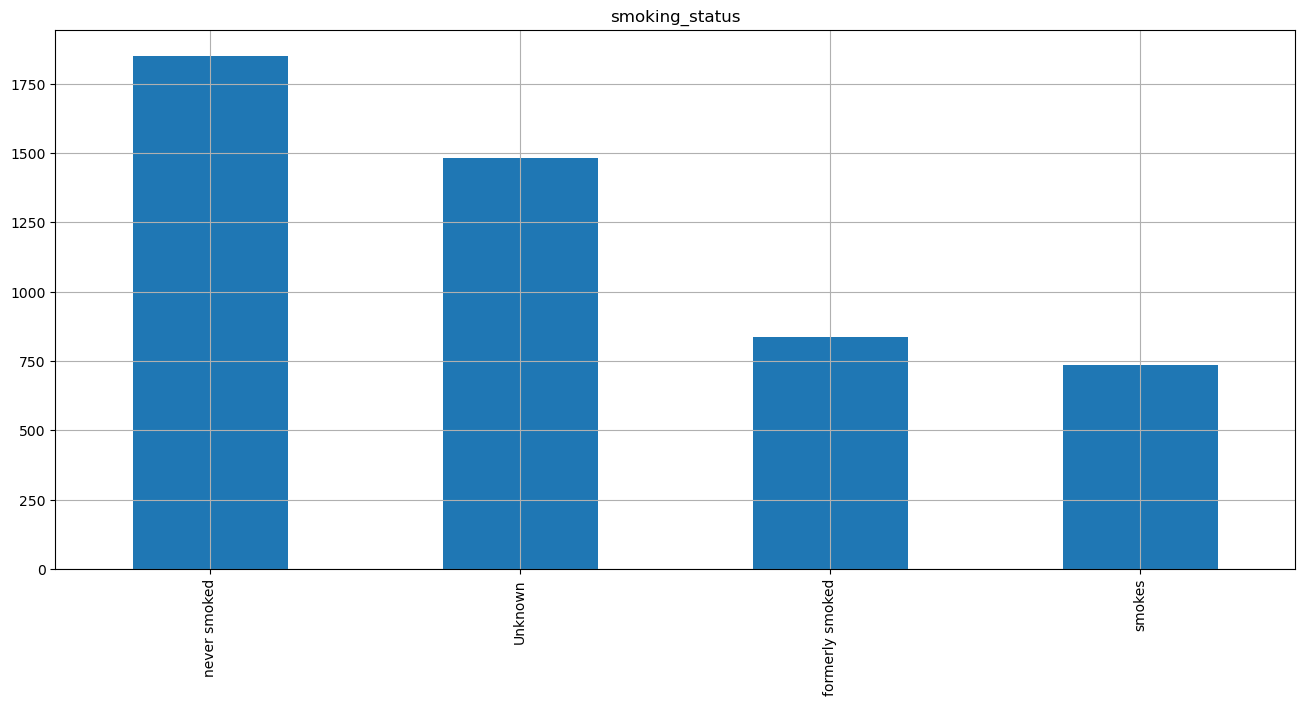

In [167]:
features_cat = ['gender','hypertension','heart_disease','ever_married',
                'work_type','Residence_type','smoking_status']
for f in features_cat:
    df[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

In [168]:
features_num = ['age', 'avg_glucose_level','bmi']
df[features_num].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
10%,10.000000,65.626000,19.700000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
90%,74.000000,187.004000,38.900000
max,82.000000,271.740000,97.600000


<AxesSubplot:>

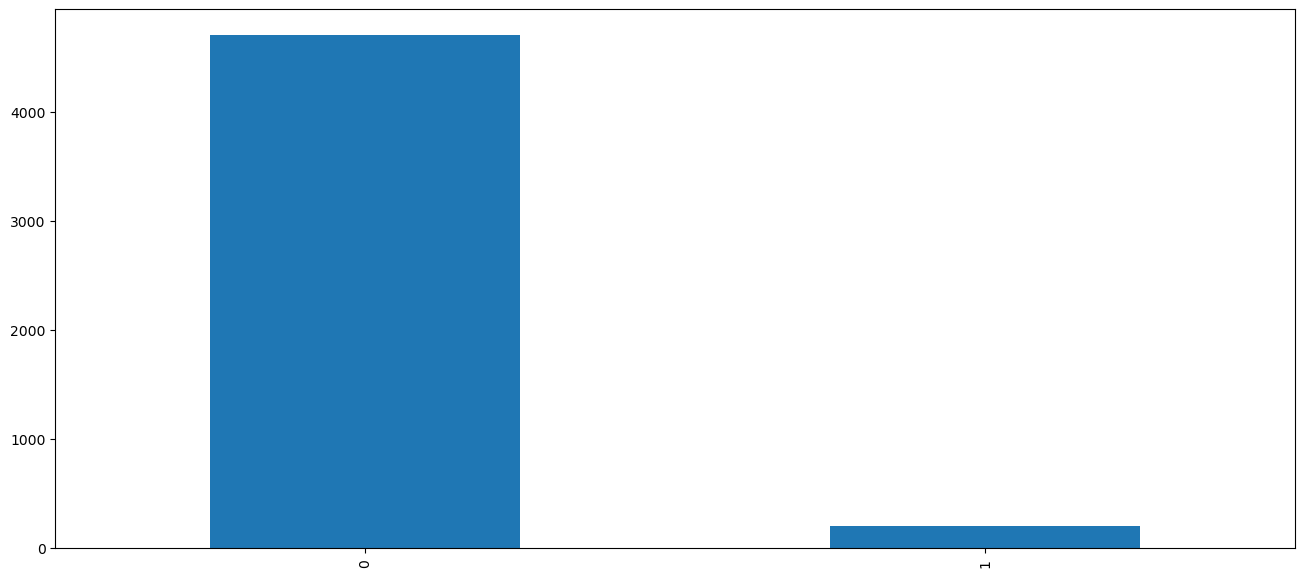

In [172]:
df['stroke'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'correlation')

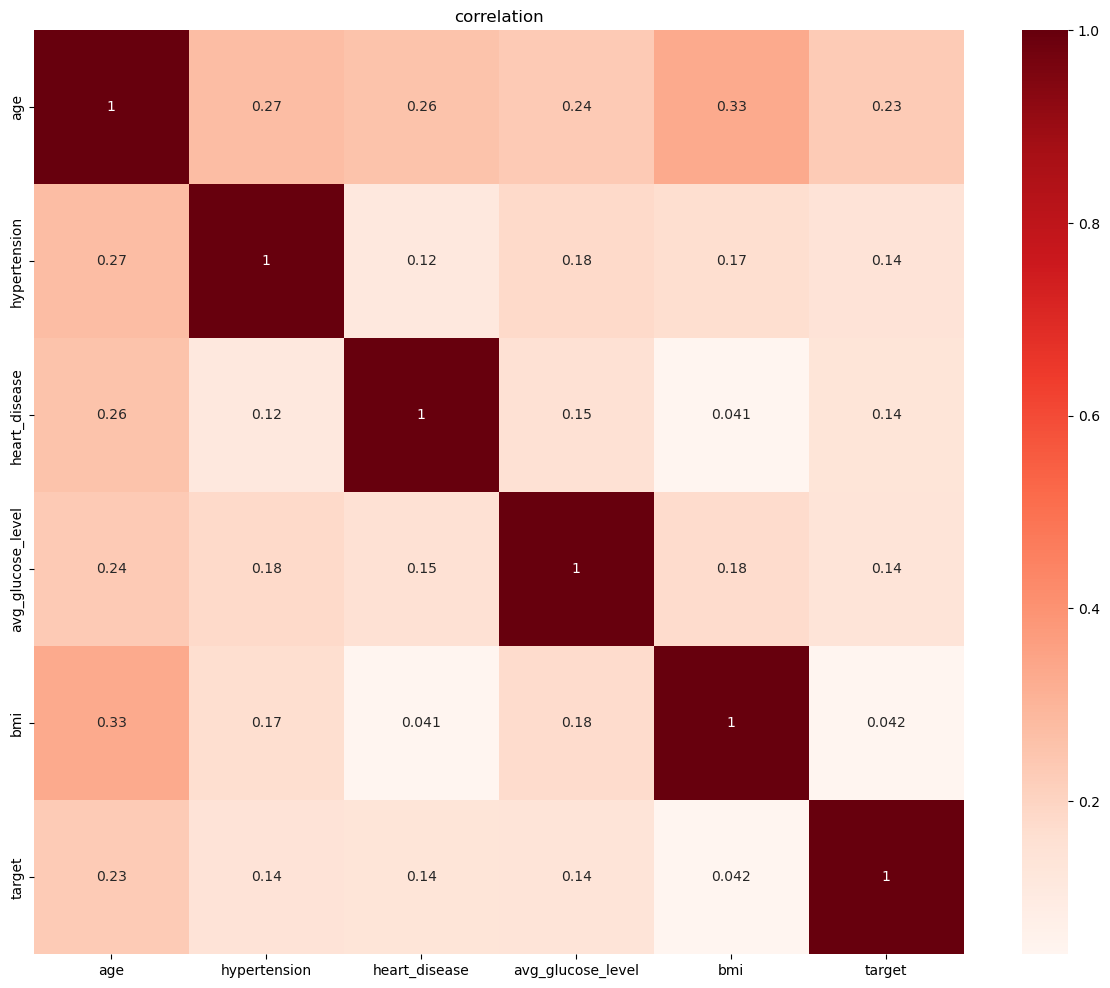

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
fig=plt.figure(figsize=(15,12))
r=sns.heatmap(corr,annot=True,cmap='Reds')
r.set_title('correlation')

In [180]:
corr.sort_values(by=['target'],ascending=False).iloc[0].sort_values(ascending=False)

target               1.000000
age                  0.232331
hypertension         0.142515
avg_glucose_level    0.138936
heart_disease        0.137938
bmi                  0.042374
Name: target, dtype: float64

In [184]:
target=df['target']
target_count=target.value_counts()
summation=target_count.sum()


In [185]:
print('percentage of strokes [1]:', np.round(100*target_count[1]/summation,2),'%')

percentage of strokes [1]: 4.26 %


In [186]:
ctab=pd.crosstab(ds.ever_married,ds.stroke)
ctab

stroke,0,1
ever_married,,
0,1682,23
1,3018,186


# BUILD A MODEL

In [150]:
predictors=features_num+features_cat
print(len(predictors))
print(predictors)

10
['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
df = pd.get_dummies(df, columns = ['work_type', 'Residence_type','smoking_status'])

In [189]:
df['ever_married']=[0 if i !='Yes' else 1 for i in df['ever_married']]
df['gender']=[0 if i!='Female' else 1 for i in df['gender']]
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,target,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1090,0,30.0,0,0,0,88.65,22.2,0,0,0,1,0,0,0,1,0,0,1,0
4347,1,30.0,0,0,1,88.56,45.3,0,0,0,1,0,0,0,1,0,0,1,0
1848,0,37.0,0,0,1,118.21,23.6,0,0,0,1,0,0,1,0,1,0,0,0
4083,1,45.0,0,0,1,92.76,22.3,0,0,0,0,1,0,0,1,1,0,0,0
1532,1,59.0,0,0,1,79.18,52.8,0,0,0,1,0,0,1,0,0,1,0,0


In [190]:
df.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
target                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [191]:
df['target'].value_counts()

0    4700
1     209
Name: target, dtype: int64

In [203]:
X=df.drop(['target'], axis=1)
y=df['target']

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split=train_test_split(X,y,test_size=0.33,random_state=42)

In [207]:
X_train.shape,X_test.shape

((3289, 18), (1620, 18))

In [208]:
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [215]:
clf_pred_train=clf_gini.predict(X_test)
print('Training Set Valuation Score',f1_score(y_test,clf_pred_train))

Training Set Valuation Score 0.04166666666666667


In [216]:
print(confusion_matrix(y_test,clf_pred_train))

[[1526   14]
 [  78    2]]


In [218]:
df['target'].value_counts()

0    4700
1     209
Name: target, dtype: int64

# Undersample the data

In [219]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
print(sorted(Counter(y_under).items()))

[(0, 209), (1, 209)]


In [221]:
from sklearn.model_selection import train_test_split
X_train_rs, X_test_rs, y_train_rs , y_test_rs = train_test_split(X_under,y_under, test_size = 0.33, random_state = 43)
X_train_rs.shape, X_test_rs.shape

((280, 18), (138, 18))

In [223]:
clf_gini.fit(X_train_rs,y_train_rs)
y_pred_rs = clf_gini.predict(X_test_rs)
print(confusion_matrix(y_test_rs,y_pred_rs))
print('The classification report is:\n{:}'.format(classification_report(y_test_rs,y_pred_rs)))


[[52 13]
 [26 47]]
The classification report is:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        65
           1       0.78      0.64      0.71        73

    accuracy                           0.72       138
   macro avg       0.72      0.72      0.72       138
weighted avg       0.73      0.72      0.72       138



# Random Forest Classifier

In [229]:
rfc=RandomForestClassifier()
rfc.fit(X_train_rs,y_train_rs)
y_pred_rfc=rfc.predict(X_test_rs)
print(confusion_matrix(y_test_rs,y_pred_rfc))
print('the accuracy score is: {:.4f}'.format(accuracy_score(y_test_rs,y_pred_rfc)))

[[48 17]
 [12 61]]
the accuracy score is: 0.7899


# SVM MODEL

In [238]:
from sklearn.svm import SVC
svm_model=SVC(random_state=1)
svm_model.fit(X_train,y_train)
print('train accuracy:', svm_model.score(X_train,y_train))
print('test accuracy:' ,svm_model.score(X_test,y_test))

train accuracy: 0.9607783520826999
test accuracy: 0.9506172839506173


# LOGISTIC REGRESSION

In [243]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('logistic regression accuracy is: {:.4f}'.format(accuracy_score(y_test,y_pred)))

logistic regression accuracy is: 0.9506
